## Calibrating Nelson-Siegel-Svensson Model using Scipy curve_fit()

### 'scipy.optimize.curve_fit' uses a non-linear least squares to fit a function.

The following code is adapted from https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

Importing libaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Define the function:
$ f(x) = a \cdot e^{-bx}+c $

In [2]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

Define the data

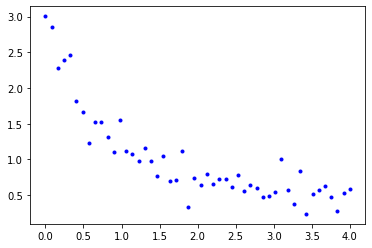

In [3]:
xdata = np.linspace(0, 4, 50) # returns 50 evenly spaced sample between 0 and 40

y = func(xdata, 2.5, 1.3, 0.5) # input 'xdata' into fuction to get 'y', where a=2.5, b=1.3, c=0.5
rng = np.random.default_rng() # construct a default BitGenerator PCG64

y_noise = 0.2 * rng.normal(size=xdata.size) # generate noise data

ydata = y + y_noise # adding noise to the data
plt.plot(xdata, ydata, 'b.', label='data') # visualizing the engineered data

We now invoke **scipy.optimize.curve_fit** to find the optimal value of a, b, and c based on the data engineered above.<br>
Since we engineered the data using the function $ f(x) = a \cdot e^{-bx}+c $ by setting a=2.5, b=1.3, c=0.5 and adding some noise to it, the optimal values for the parameters (i.e. a,b and c) should be near to 2.5, 1.3 and 0.5

Invoking Scipy curve_fit()

In [4]:
popt, pcov = curve_fit(func, xdata, ydata)
popt

array([2.43788937, 1.33937834, 0.53730713])

### Visualizing the data and curve fit together

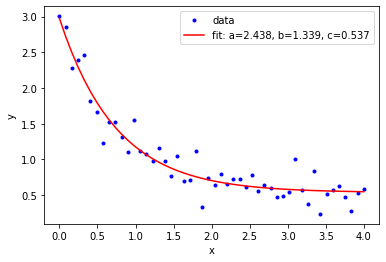

In [5]:
plt.plot(xdata, ydata, 'b.', label='data')
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Applying 'scipy.optimize.curve_fit' into Nelson-Siegel Model

###  Nelson and Siegel (1987)

Define Nelson and Siegel forward function as follows: <br>
<br>
$ f(m:b) = {\beta}_0 + {\beta}_1 exp({-\frac{m}{{\tau}_1}}) + {\beta}_2 \frac{m}{{\tau}_1} exp({-\frac{m}{{\tau}_1}}) $ <br>
<br>
where $ \beta = ({\beta}_0,{\beta}_1,{\beta}_2,{\tau}_1) $ <br>
subject to the following constraints: <br>

$ {\beta}_0 > 0 $ <br>
$ {\beta}_0 + {\beta}_1 > 0 $ <br>
$ {\tau}_1 > 0 $

In [6]:
def NS(m, beta0, beta1, beta2, tau1):
    if (beta0 + beta1) > 0:
        return beta0 + (beta1 * np.exp(-m / tau1)) + (beta2 * (-m/tau1) * np.exp(-m/tau1))

In [7]:
xdata = np.array([1/12, 3/12, 6/12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) # tenor
ydata = np.array([5.0521, 5.286, 5.434, 5.707, 6.083, 6.365, 6.598, 6.711, 6.878, 6.967, 7.058, 7.106, 7.102]) # yield

In [8]:
# beta0, (beta0 + beta1) and tau1 must be positive
popt, pcov = curve_fit(NS, xdata, ydata, bounds = ( (0,-np.inf,-np.inf,0), (np.inf,np.inf,np.inf,np.inf)))
popt

array([ 7.20240544e+00, -2.11411976e+00,  1.02854294e-05,  3.17438173e+00])

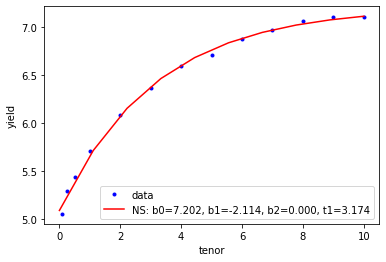

In [9]:
plt.plot(xdata, ydata, 'b.', label='data')

x_data = np.linspace(0, 10, 10)
plt.plot(x_data, NS(x_data, *popt), 'r-', label='NS: b0=%5.3f, b1=%5.3f, b2=%5.3f, t1=%5.3f' % tuple(popt))

plt.xlabel('tenor')
plt.ylabel('yield')
plt.legend()
plt.show()

## Applying 'scipy.optimize.curve_fit' into Nelson-Siegel-Sevensson Model

###  Nelson-Siege-Svensson (1994)

Define Nelson-Siegel-Svensson function as follows: <br>
<br>
$ f(m:b) = {\beta}_0 + {\beta}_1 exp({-\frac{m}{{\tau}_1}}) + {\beta}_2 \frac{m}{{\tau}_1} exp({-\frac{m}{{\tau}_1}}) + {\beta}_3 \frac{m}{{\tau}_2} exp({-\frac{m}{{\tau}_2}})$ <br>
<br>
where $ \beta = ({\beta}_0,{\beta}_1,{\beta}_2,{\tau}_1,{\tau}_2) $ <br>
subject to the following constraints: <br>

$ {\beta}_0 > 0 $ <br>
$ {\beta}_0 + {\beta}_1 > 0 $ <br>
$ {\tau}_1, {\tau}_2 > 0 $

In [10]:
def NSS(m, beta0, beta1, beta2, beta3, tau1, tau2):
    if beta0 + beta1 > 0:
        return beta0 + (beta1 * np.exp(-m / tau1)) + (beta2 * (m/tau1) * np.exp(-m/tau1)) + (beta3 * (m/tau2) * np.exp(-m/tau2))

In [11]:
xdata = np.array([1/12, 3/12, 6/12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) # tenor
ydata = np.array([5.0521, 5.286, 5.434, 5.707, 6.083, 6.365, 6.598, 6.711, 6.878, 6.967, 7.058, 7.106, 7.102]) # yield

In [12]:
# beta0, (beta0 + beta1), tau1 and tau2 must be positive
popt, pcov = curve_fit(NSS, xdata, ydata, bounds = ( (0,-np.inf,-np.inf,0,0,0), (np.inf,np.inf,np.inf,np.inf,np.inf,np.inf) ))
popt

array([ 7.21905116e+00, -2.26262864e+00, -9.42607427e-05,  4.58100924e-01,
        3.17163816e+00,  6.16403484e-01])

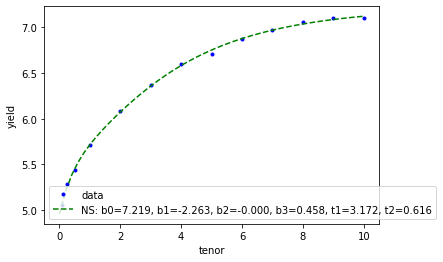

In [13]:
plt.plot(xdata, ydata, 'b.', label='data')

x_data = np.linspace(0, 10, 50)
plt.plot(x_data, NSS(x_data, *popt), 'g--', label='NS: b0=%5.3f, b1=%5.3f, b2=%5.3f, b3=%5.3f, t1=%5.3f, t2=%5.3f' % tuple(popt))

plt.xlabel('tenor')
plt.ylabel('yield')
plt.legend()
plt.show()